<a href="https://colab.research.google.com/github/proBIKRAM/AI-Lab-Bikram/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Converged at iteration 5


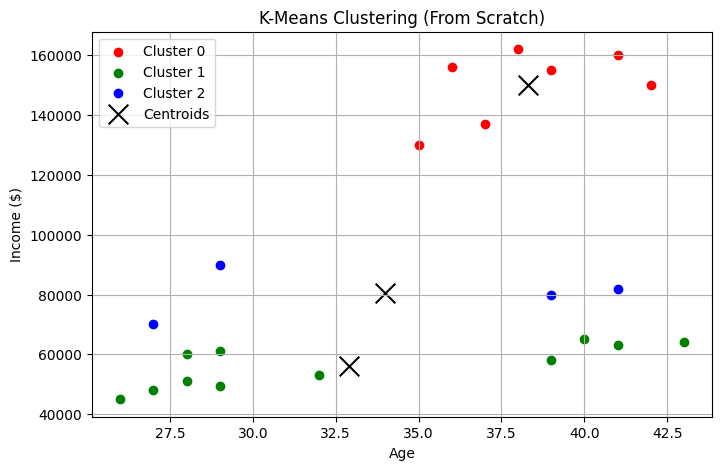

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 2: Define Data Inline (no need for income.csv)
data_dict = {
    'Name': ['Rob', 'Michael', 'Mohan', 'Ismail', 'Kory', 'Gautam', 'David', 'Andrea', 'Brad', 'Angelina',
             'Donald', 'Tom', 'Arnold', 'Jared', 'Stark', 'Ranbir', 'Dipika', 'Priyanka', 'Nick', 'Alia', 'Sid', 'Abdul'],
    'Age': [27, 29, 29, 28, 42, 39, 41, 38, 36, 35,
            37, 26, 27, 28, 29, 32, 40, 41, 43, 39, 41, 39],
    'Income($)': [70000, 90000, 61000, 60000, 150000, 155000, 160000, 162000, 156000, 130000,
                  137000, 45000, 48000, 51000, 49500, 53000, 65000, 63000, 64000, 80000, 82000, 58000]
}

df = pd.DataFrame(data_dict)
data = df[['Age', 'Income($)']].values

# Step 3: Set K-Means Parameters
k = 3
max_iters = 100

# Step 4: Initialize Centroids
random.seed(42)
initial_centroids = data[random.sample(range(len(data)), k)]

# Step 5: Define Euclidean Distance
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Step 6: Run K-Means
centroids = initial_centroids
for iteration in range(max_iters):
    # Assignment Step
    clusters = [[] for _ in range(k)]
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    # Save previous centroids for convergence check
    old_centroids = centroids.copy()

    # Update Centroids
    centroids = [np.mean(cluster, axis=0) if cluster else old_centroids[i] for i, cluster in enumerate(clusters)]

    # Check for convergence
    converged = np.all([np.allclose(old_centroids[i], centroids[i]) for i in range(k)])
    if converged:
        print(f"✅ Converged at iteration {iteration + 1}")
        break

# Step 7: Assign Final Labels
labels = []
for point in data:
    distances = [euclidean(point, centroid) for centroid in centroids]
    labels.append(np.argmin(distances))
df['Cluster'] = labels

# Step 8: Plot Results
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 5))
for i in range(k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Age'], cluster_points['Income($)'], color=colors[i], label=f'Cluster {i}')
plt.scatter(*zip(*centroids), color='black', marker='x', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('K-Means Clustering (From Scratch)')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Show Final Data
df[['Name', 'Age', 'Income($)', 'Cluster']]
